In [2]:
!pip install sympy

  Obtaining dependency information for sympy from https://files.pythonhosted.org/packages/d2/05/e6600db80270777c4a64238a98d442f0fd07cc8915be2a1c16da7f2b9e74/sympy-1.12-py3-none-any.whl.metadata
  Obtaining dependency information for mpmath>=0.19 from https://files.pythonhosted.org/packages/43/e3/7d92a15f894aa0c9c4b49b8ee9ac9850d6e63b03c9c32c0367a13ae62209/mpmath-1.3.0-py3-none-any.whl.metadata
   ---------------------------------------- 5.7/5.7 MB 9.7 MB/s eta 0:00:00
   --------------------------------------- 536.2/536.2 kB 11.2 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import os
import numpy as np
from datetime import datetime
import sympy as sp
import scipy as sc

In [5]:
dfc = pd.read_csv("D:/proyeto cripto/tradingbot/cristian/scrips/by1h/BTCUSDT")
# df = df.set_index(df.Tiempo)
dfc  

,Tiempo,Open,High,Low,Close,Volume
0,2017-08-17 04:00:00,4261.48,4313.62,4261.32,4308.83,47.181009
1,2017-08-17 05:00:00,4308.83,4328.69,4291.37,4315.32,23.234916
2,2017-08-17 06:00:00,4330.29,4345.45,4309.37,4324.35,7.229691
3,2017-08-17 07:00:00,4316.62,4349.99,4287.41,4349.99,4.443249
4,2017-08-17 08:00:00,4333.32,4377.85,4333.32,4360.69,0.972807
...,...,...,...,...,...,...
57823,2024-03-27 19:00:00,68475.60,68933.33,68468.01,68652.00,1505.426370
57824,2024-03-27 20:00:00,68652.01,69163.01,68630.00,68906.02,1062.903970
57825,2024-03-27 21:00:00,68906.01,69250.00,68900.00,68941.99,1093.453870
57826,2024-03-27 22:00:00,68942.00,69441.40,68919.46,69440.14,1447.007180


In [84]:
dft = pd.read_csv(f'C:/Users/tinma/OneDrive/Escritorio/tradingbot/csvs/historical/by1h/BTCUSDT')
# df = df.set_index(df.Tiempo)
dft  

,Tiempo,Open,High,Low,Close,Volume
0,2017-08-17 04:00:00,4261.48,4313.62,4261.32,4308.83,47.181009
1,2017-08-17 05:00:00,4308.83,4328.69,4291.37,4315.32,23.234916
2,2017-08-17 06:00:00,4330.29,4345.45,4309.37,4324.35,7.229691
3,2017-08-17 07:00:00,4316.62,4349.99,4287.41,4349.99,4.443249
4,2017-08-17 08:00:00,4333.32,4377.85,4333.32,4360.69,0.972807
...,...,...,...,...,...,...
57823,2024-03-27 19:00:00,68475.60,68933.33,68468.01,68652.00,1505.426370
57824,2024-03-27 20:00:00,68652.01,69163.01,68630.00,68906.02,1062.903970
57825,2024-03-27 21:00:00,68906.01,69250.00,68900.00,68941.99,1093.453870
57826,2024-03-27 22:00:00,68942.00,69441.40,68919.46,69440.14,1447.007180


In [100]:
try:
    if type(dfc) == pd.core.frame.DataFrame:
        df = dfc
except:
        df = dft

In [85]:
dft.Tiempo = dft.Tiempo.astype('datetime64')

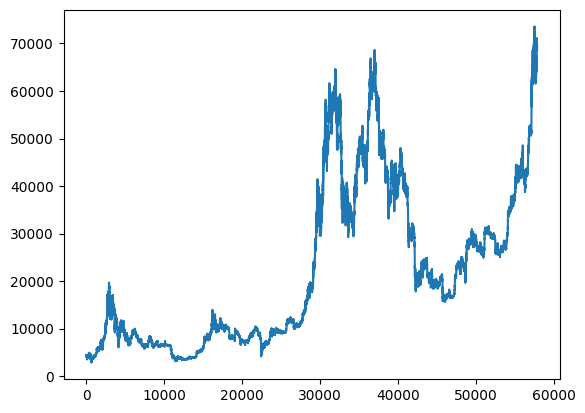

In [86]:
import matplotlib.pyplot as plt
plt.plot(dft.Open)

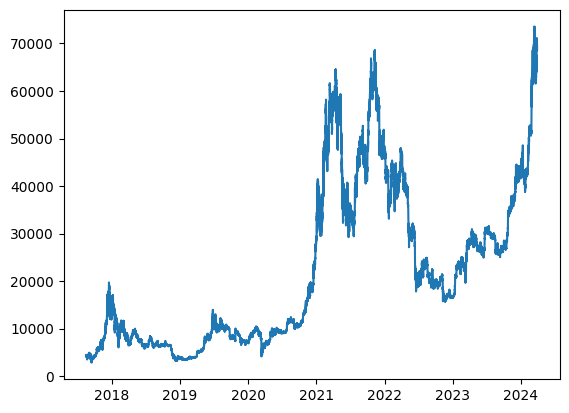

In [6]:
import matplotlib.pyplot as plt
plt.plot(dft.Tiempo,dft.Open)

# Análisis de Derivadas

In [65]:
dft['Interpolacion'] = sc.signal.savgol_filter(dft.Open,1500,3)
dft

,Tiempo,Open,High,Low,Close,Volume,Interpolacion,Fourier_Freq
0,2017-08-17 04:00:00,4261.48,4313.62,4261.32,4308.83,47.181009,4023.392451,1.275272e+09-0.000000e+00j
1,2017-08-17 05:00:00,4308.83,4328.69,4291.37,4315.32,23.234916,4026.192954,-1.139044e+08+4.646314e+08j
2,2017-08-17 06:00:00,4330.29,4345.45,4309.37,4324.35,7.229691,4028.980025,1.610100e+08-1.489515e+08j
3,2017-08-17 07:00:00,4316.62,4349.99,4287.41,4349.99,4.443249,4031.753688,1.476386e+08+2.564946e+08j
4,2017-08-17 08:00:00,4333.32,4377.85,4333.32,4360.69,0.972807,4034.513965,-2.693153e+07+2.904293e+07j
...,...,...,...,...,...,...,...,...
57823,2024-03-27 19:00:00,68475.60,68933.33,68468.01,68652.00,1505.426370,65717.251744,-9.567006e+06-7.777329e+07j
57824,2024-03-27 20:00:00,68652.01,69163.01,68630.00,68906.02,1062.903970,65686.997047,-2.693153e+07-2.904293e+07j
57825,2024-03-27 21:00:00,68906.01,69250.00,68900.00,68941.99,1093.453870,65656.581504,1.476386e+08-2.564946e+08j
57826,2024-03-27 22:00:00,68942.00,69441.40,68919.46,69440.14,1447.007180,65626.004914,1.610100e+08+1.489515e+08j


In [79]:
# Fechas de los Halvings anteriores: 28 de Noviembre de 2012, 9 de Julio de 2016, 11 de Mayo de 2020, 20 de Abril de 2024

halving_dates = ['28-11-2012','9-7-2016','11-5-2020','20-4-2024']
j = 0
for i in halving_dates:
    d = datetime.strptime(i, "%d-%m-%Y")
    halving_dates[j] = d
    j += 1
halving_dates = pd.DataFrame(halving_dates,columns=['Halving_Dates'])
halving_dates

# dft.Tiempo[dft.Tiempo]

,Halving_Dates
0,2012-11-28
1,2016-07-09
2,2020-05-11
3,2024-04-20


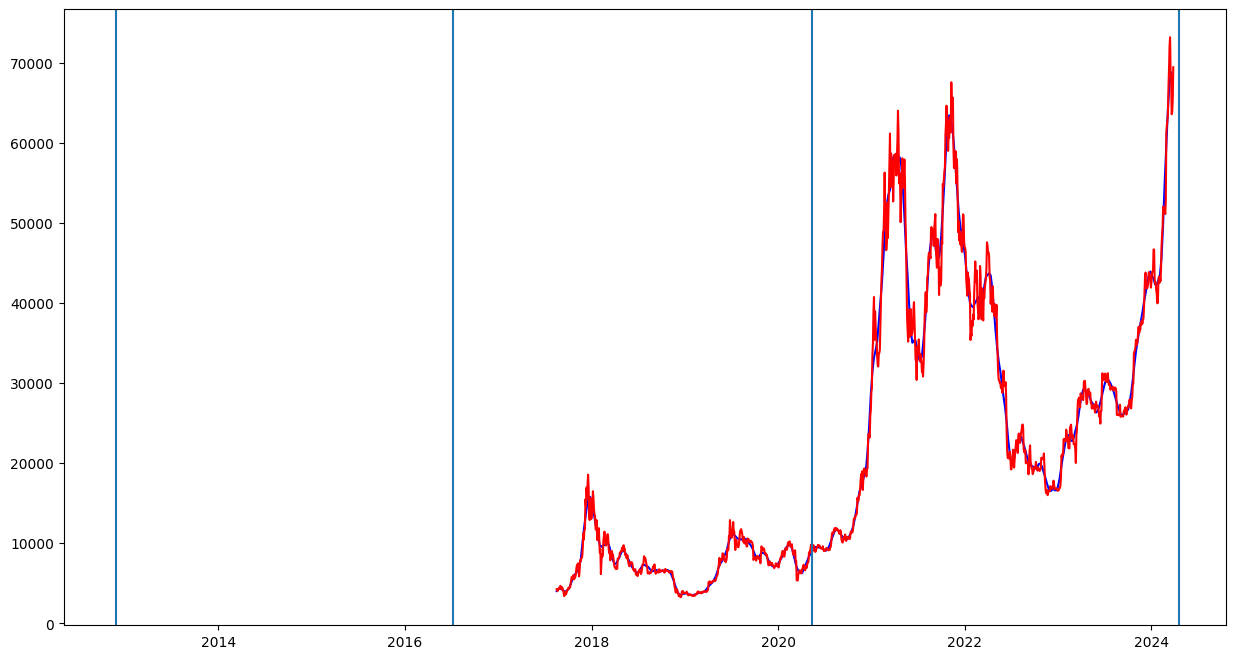

In [80]:
plt.figure(figsize=(15,8))
plt.plot(dft.Tiempo[::150],dft.Interpolacion[::150],color='blue')
plt.plot(dft.Tiempo[::50],dft.Open[::50],color='red')
for i in halving_dates['Halving_Dates']:
    plt.axvline(i);
plt.show()

# Análisis de Fourier

c:\Users\tinma\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


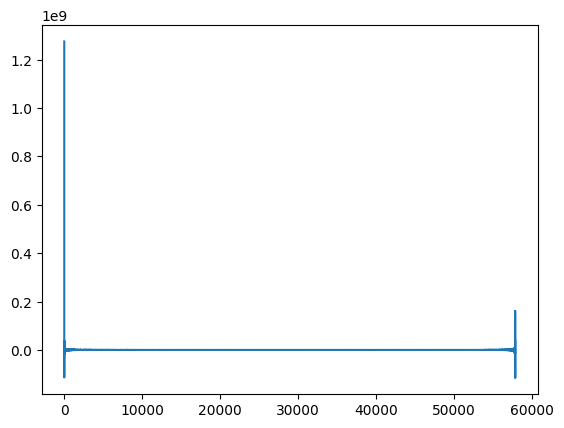

In [19]:
# from .fft import fft, fftfreq

yf = sc.fft.fft(dft.Open.to_numpy())
dft['Fourier_Freq'] = yf

plt.plot(dft.Fourier_Freq)


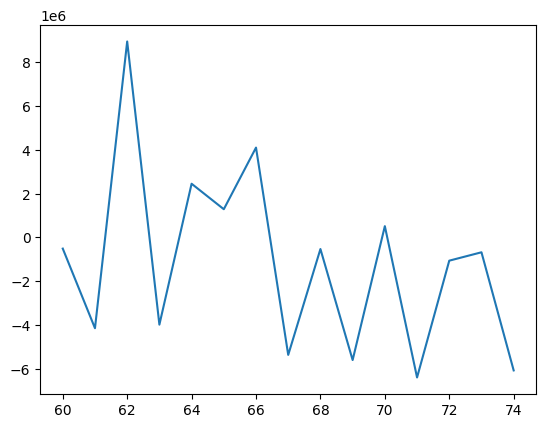

In [83]:
plt.plot(dft.Fourier_Freq[60:75])

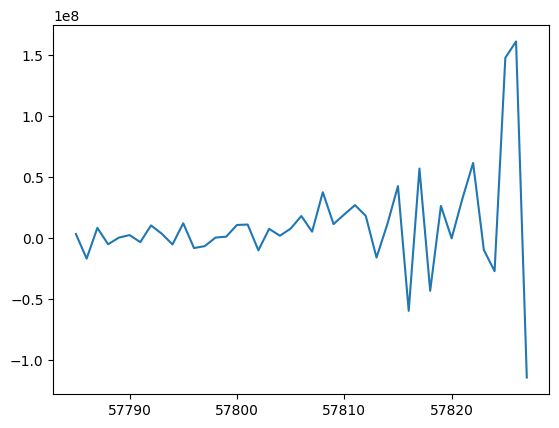

In [32]:
plt.plot(dft.Fourier_Freq[57785:])